In [0]:
!pip install tensorflow==1.5.0

In [0]:
import tensorflow as tf
tf.__version__

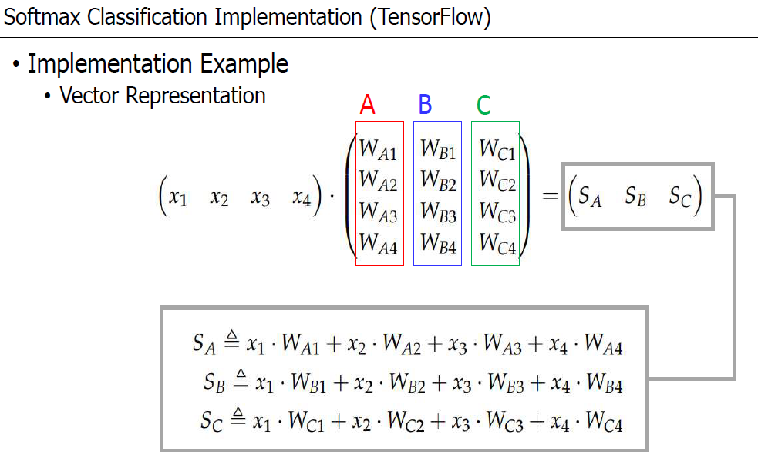


In [0]:
P71
w,b update 갯수
W = (4*3)  12개
b 3개

총 15개의 변수가 update
----------------------
matmul 함수

----------------------


## Linear Regression ##

In [0]:
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
import tensorflow as tf
import numpy as np
import time

x_data = [[1,1],[2,2],[3,3]]
y_data = [[10],[20],[30]]
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
model = tf.matmul(X,W)+b
cost = tf.reduce_mean(tf.square(model-Y))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)   #

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        c, _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
        print(step, c)
    print(sess.run(model, feed_dict={X: [[4,4]]}))

0 510.27432
1 323.30472
2 204.85344
3 129.81062
4 82.26847
5 52.148865
6 33.066986
7 20.977861
8 13.318862
9 8.466494
10 5.3922215
11 3.4444191
12 2.210284
13 1.4282681
14 0.9326913
15 0.6185828
16 0.41943905
17 0.29313052
18 0.21296954
19 0.16204126
20 0.12963529
21 0.10896387
22 0.09572848
23 0.087203056
24 0.08166457
25 0.07801731
26 0.07556906
27 0.07388198
28 0.07267703
29 0.071778655
30 0.071075715
31 0.070496134
32 0.069996186
33 0.06954738
34 0.06913123
35 0.06873662
36 0.06835655
37 0.067986235
38 0.06762309
39 0.06726456
40 0.06690999
41 0.0665584
42 0.06620964
43 0.06586275
44 0.06551852
45 0.06517644
46 0.064835966
47 0.06449737
48 0.064160444
49 0.06382537
50 0.063492
51 0.06316061
52 0.06283108
53 0.06250294
54 0.062176626
55 0.06185181
56 0.061529055
57 0.061207905
58 0.060888093
59 0.06057058
60 0.06025417
61 0.059939574
62 0.05962673
63 0.059315518
64 0.059005883
65 0.05869786
66 0.058391213
67 0.05808643
68 0.057783246
69 0.057481464
70 0.057181418
71 0.05688301
72 0.

## Binary Classfication ##

In [0]:
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
import tensorflow as tf
import numpy as np
import time

x_data = [[1,1],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
X = tf.placeholder(tf.float32, shape=[None,2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
model = tf.sigmoid(tf.matmul(X,W)+b)
cost = tf.reduce_mean((-1)*Y*tf.log(model) + (-1)*(1-Y)*tf.log(1-model))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

prediction = tf.cast(model > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training
    for step in range(10001):
        cost_val, train_val = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)
    # Tesintg
    h, c, a = sess.run([model, prediction, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nModel: ", h,"\nCorrect: ", c, "\nAccuracy:", a)

0 3.0272062
1000 0.52537054
2000 0.39717588
3000 0.3240692
4000 0.27455044
5000 0.2387538
6000 0.21164536
7000 0.19036342
8000 0.1731766
9000 0.15898137
10000 0.14704145

Model:  [[0.02277231]
 [0.17174879]
 [0.29361123]
 [0.78717524]
 [0.9398351 ]
 [0.9784716 ]] 
Correct:  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy: 1.0


In [13]:
import tensorflow as tf
import numpy as np
import time

xy = np.loadtxt('data-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_date = xy[:, [-1]]

x_data.shape

(759, 8)

Binary Classfication(파일 읽어오기)


In [2]:
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
import tensorflow as tf
import numpy as np
import time

xy = np.loadtxt('data-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

W = tf.Variable(tf.random_normal([x_data.shape[1],1]))
b = tf.Variable(tf.random_normal([1]))
X = tf.placeholder(tf.float32, shape=[None, x_data.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None, 1])

model = tf.sigmoid(tf.matmul(X,W)+b)
cost = tf.reduce_mean((-1)*Y*tf.log(model) + (-1)*(1-Y)*tf.log(1-model))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

prediction = tf.cast(model > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training
    for step in range(10001):
        cost_val, train_val = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)
    # Tesintg
    h, c, a = sess.run([model, prediction, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nModel: ", h,"\nCorrect: ", c, "\nAccuracy:", a)

0 0.6047595
1000 0.5609264
2000 0.53884846
3000 0.52396154
4000 0.5134387
5000 0.5057128
6000 0.4998658
7000 0.49533182
8000 0.49174553
9000 0.48886144
10000 0.48650923

Model:  [[0.3894067 ]
 [0.9144485 ]
 [0.26159504]
 [0.95424634]
 [0.21723722]
 [0.7758856 ]
 [0.96115863]
 [0.65538925]
 [0.26608554]
 [0.49814397]
 [0.65608245]
 [0.1778182 ]
 [0.2523851 ]
 [0.2008995 ]
 [0.7824958 ]
 [0.4536576 ]
 [0.7453935 ]
 [0.9323173 ]
 [0.8309346 ]
 [0.5393523 ]
 [0.6668076 ]
 [0.09179864]
 [0.5978921 ]
 [0.70604056]
 [0.38174725]
 [0.9269679 ]
 [0.55340564]
 [0.6003345 ]
 [0.6528554 ]
 [0.41716427]
 [0.95353425]
 [0.85218   ]
 [0.53110826]
 [0.84954405]
 [0.3763181 ]
 [0.6131716 ]
 [0.8141492 ]
 [0.6020147 ]
 [0.4944884 ]
 [0.33478528]
 [0.73720783]
 [0.08703827]
 [0.47551554]
 [0.04538221]
 [0.6459869 ]
 [0.90723217]
 [0.67868245]
 [0.75363034]
 [0.9159864 ]
 [0.9455166 ]
 [0.9405607 ]
 [0.20732997]
 [0.38669375]
 [0.96190023]
 [0.23461178]
 [0.528605  ]
 [0.10682528]
 [0.766976  ]
 [0.905558

Binary + hidden layer

In [4]:
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
import tensorflow as tf
import numpy as np
import time

xy = np.loadtxt('data-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

#W = tf.Variable(tf.random_normal([x_data.shape[1],1]))
#b = tf.Variable(tf.random_normal([1]))
W1 = tf.Variable(tf.random_normal([x_data.shape[1],1000]))
b1 = tf.Variable(tf.random_normal([1000]))
W2 = tf.Variable(tf.random_normal([1000,1]))
b2 = tf.Variable(tf.random_normal([1]))
X = tf.placeholder(tf.float32, shape=[None, x_data.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None, 1])

model_w1 = tf.sigmoid(tf.matmul(X,W1)+b1)
model = tf.sigmoid(tf.matmul(model_w1,W2)+b2)
cost = tf.reduce_mean((-1)*Y*tf.log(model) + (-1)*(1-Y)*tf.log(1-model))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

prediction = tf.cast(model > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training
    for step in range(10001):
        cost_val, train_val = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)
    # Tesintg
    h, c, a = sess.run([model, prediction, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nModel: ", h,"\nCorrect: ", c, "\nAccuracy:", a)

0 14.486587
1000 0.5007575
2000 0.47363076
3000 0.4595701
4000 0.45019805
5000 0.44353178
6000 0.43852887
7000 0.43460023
8000 0.43139783
9000 0.42870647
10000 0.42638782

Model:  [[0.23965594]
 [0.9897216 ]
 [0.10241253]
 [0.9838171 ]
 [0.04559154]
 [0.78243566]
 [0.9773741 ]
 [0.6430404 ]
 [0.04308077]
 [0.74270093]
 [0.76420426]
 [0.0885062 ]
 [0.51417035]
 [0.5502842 ]
 [0.71295893]
 [0.45976216]
 [0.73787844]
 [0.6804035 ]
 [0.7533994 ]
 [0.5608591 ]
 [0.7840782 ]
 [0.05942215]
 [0.5610572 ]
 [0.56662494]
 [0.13505909]
 [0.99208075]
 [0.85966647]
 [0.6449083 ]
 [0.7071755 ]
 [0.36592644]
 [0.99376416]
 [0.9514447 ]
 [0.36977878]
 [0.9031017 ]
 [0.31526732]
 [0.51680505]
 [0.906127  ]
 [0.80485404]
 [0.31706083]
 [0.2582352 ]
 [0.91812444]
 [0.0725191 ]
 [0.11718132]
 [0.14220443]
 [0.4398169 ]
 [0.99198127]
 [0.562915  ]
 [0.7543465 ]
 [0.9940597 ]
 [0.9799784 ]
 [0.9815124 ]
 [0.32592165]
 [0.12997106]
 [0.99836344]
 [0.03069322]
 [0.53657794]
 [0.23907216]
 [0.90109617]
 [0.8594

In [10]:
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
import tensorflow as tf
import numpy as np
import time

xy = np.loadtxt('data-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

#W = tf.Variable(tf.random_normal([x_data.shape[1],1]))
#b = tf.Variable(tf.random_normal([1]))
W1 = tf.Variable(tf.random_normal([x_data.shape[1],1000]))
b1 = tf.Variable(tf.random_normal([1000]))
W2 = tf.Variable(tf.random_normal([1000,100]))
b2 = tf.Variable(tf.random_normal([100]))
W3 = tf.Variable(tf.random_normal([100,1]))
b3 = tf.Variable(tf.random_normal([1]))
X = tf.placeholder(tf.float32, shape=[None, x_data.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None, 1])

model_w1 = tf.sigmoid(tf.matmul(X,W1)+b1)
model_w2 = tf.sigmoid(tf.matmul(model_w1,W2)+b2)
model = tf.sigmoid(tf.matmul(model_w2,W3)+b3)
cost = tf.reduce_mean((-1)*Y*tf.log(model) + (-1)*(1-Y)*tf.log(1-model))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

prediction = tf.cast(model > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training
    for step in range(10001):
        cost_val, train_val = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)
    # Tesintg
    h, c, a = sess.run([model, prediction, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nModel: ", h,"\nCorrect: ", c, "\nAccuracy:", a)

0 1.1701134
1000 0.3631648
2000 0.31720018
3000 0.27989194
4000 0.25025642
5000 0.2254574
6000 0.20450123
7000 0.18592153
8000 0.1689957
9000 0.15343834
10000 0.13905247

Model:  [[1.85018573e-02]
 [9.95751023e-01]
 [2.25484893e-02]
 [9.99756277e-01]
 [4.37411070e-02]
 [9.40155745e-01]
 [5.29381335e-01]
 [7.61622369e-01]
 [2.02109036e-03]
 [2.10747778e-01]
 [9.92784500e-01]
 [7.36514628e-02]
 [9.97829020e-01]
 [4.07359637e-02]
 [5.03747225e-01]
 [2.48355761e-01]
 [9.93398651e-02]
 [9.95567858e-01]
 [4.70067590e-01]
 [8.83940518e-01]
 [8.40762913e-01]
 [3.06260306e-04]
 [4.36104059e-01]
 [1.82034090e-01]
 [4.50714588e-01]
 [9.98829067e-01]
 [9.80657399e-01]
 [9.95685577e-01]
 [9.65512156e-01]
 [9.23098437e-03]
 [9.99682426e-01]
 [9.96470690e-01]
 [7.68400490e-01]
 [8.34258258e-01]
 [6.53591335e-01]
 [7.81283826e-02]
 [3.56413811e-01]
 [9.16556418e-02]
 [5.15531242e-01]
 [8.83458018e-01]
 [9.95948255e-01]
 [1.29307911e-03]
 [3.22173297e-01]
 [2.49763764e-02]
 [7.85192728e-01]
 [9.9727231

## GAN ##


In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
